# Rapport de Projet : Apprentissage par Renforcement

**Matière :** Apprentissage par Renforcement  
**Objectif :** Implémenter et comprendre les algorithmes classiques de RL  
**Date :** Janvier 2025

---

## Table des Matières

1. [Introduction](#1-introduction)
2. [Algorithmes Implémentés](#2-algorithmes-implémentés)
3. [Environnements](#3-environnements)
4. [Résultats et Analyses](#4-résultats-et-analyses)
5. [Comparaison des Algorithmes](#5-comparaison-des-algorithmes)
6. [Conclusion](#6-conclusion)


## 1. Introduction

### 1.1 Objectifs du Projet

Ce projet vise à :
- Implémenter les algorithmes classiques de l'apprentissage par renforcement
- Développer plusieurs environnements pour tester ces algorithmes
- Comparer les performances des différents algorithmes
- Comprendre quand utiliser chaque type d'algorithme

### 1.2 Structure du Projet

Le projet est organisé en deux bibliothèques principales :
- **`algos/`** : Bibliothèque d'algorithmes RL
- **`envs/`** : Bibliothèque d'environnements


## 2. Algorithmes Implémentés

### 2.1 Algorithmes de Planification (Model-Based)

#### Policy Iteration
- **Type** : Planification dynamique
- **Principe** : Alterne entre évaluation de politique et amélioration de politique
- **Avantages** : Convergence garantie vers l'optimalité
- **Limitations** : Nécessite un modèle MDP complet, lent pour grands espaces d'états

#### Value Iteration
- **Type** : Planification dynamique
- **Principe** : Itère directement sur la fonction de valeur
- **Avantages** : Plus simple que Policy Iteration, optimal garanti
- **Limitations** : Nécessite un modèle MDP complet

### 2.2 Algorithmes Model-Free

#### Q-Learning
- **Type** : Off-policy TD learning
- **Principe** : Apprend la fonction Q-value en utilisant la meilleure action future
- **Avantages** : Simple, efficace, ne nécessite pas de modèle
- **Utilisation** : Standard pour les problèmes RL sans modèle

#### SARSA
- **Type** : On-policy TD learning
- **Principe** : Apprend en utilisant l'action réellement prise
- **Avantages** : Plus conservateur que Q-Learning, bon pour problèmes avec risques
- **Différence avec Q-Learning** : Utilise l'action réelle au lieu de la meilleure

#### Expected SARSA
- **Type** : On-policy TD learning
- **Principe** : Utilise l'espérance des Q-values au lieu de la valeur maximale
- **Avantages** : Réduit la variance, plus stable que SARSA

### 2.3 Algorithmes Monte Carlo

#### Monte Carlo ES (Exploring Starts)
- **Type** : Monte Carlo avec exploring starts
- **Principe** : Apprend à partir d'épisodes complets
- **Avantages** : Pas besoin de modèle, apprend directement depuis l'expérience
- **Limitations** : Lent (doit attendre fin d'épisode), nécessite exploring starts

#### On-Policy Monte Carlo
- **Type** : Monte Carlo on-policy
- **Principe** : Utilise epsilon-greedy pour exploration
- **Avantages** : Plus réaliste que ES (pas besoin d'exploring starts)

#### Off-Policy Monte Carlo
- **Type** : Monte Carlo off-policy
- **Principe** : Utilise importance sampling pour apprendre une politique différente
- **Avantages** : Peut apprendre une politique optimale tout en explorant

### 2.4 Algorithmes avec Planning

#### Dyna-Q
- **Type** : Q-Learning avec planning
- **Principe** : Combine apprentissage réel et simulation (planning)
- **Avantages** : Plus efficace que Q-Learning seul, utilise un modèle appris

#### Dyna-Q+
- **Type** : Dyna-Q avec exploration bonus
- **Principe** : Ajoute un bonus d'exploration pour les transitions anciennes
- **Avantages** : Meilleur pour environnements non-stationnaires


## 3. Environnements

### 3.1 Environnements Standards

#### LineWorldSimple
- **Type** : Environnement linéaire simple
- **États** : Positions discrètes sur une ligne
- **Actions** : Gauche, Droite
- **Objectif** : Atteindre l'état terminal

#### GridWorldSimple
- **Type** : Grille 2D avec obstacles
- **États** : Positions (x, y) sur la grille
- **Actions** : Haut, Bas, Gauche, Droite
- **Objectif** : Atteindre la case objectif en évitant les obstacles

### 3.2 Environnements Secrets

#### SecretEnv0
- **États** : 8192 états
- **Complexité** : Relativement simple
- **Caractéristiques** : Environnement de test pour algorithmes model-free

#### SecretEnv1
- **États** : 65536 états
- **Complexité** : Moyenne
- **Caractéristiques** : Environnement de taille moyenne

#### SecretEnv2
- **États** : 2097152 états (très grand)
- **Complexité** : Élevée
- **Caractéristiques** : Teste la scalabilité des algorithmes

#### SecretEnv3
- **États** : 65536 états
- **Complexité** : Moyenne
- **Caractéristiques** : Environnement de taille moyenne

**Note** : Les algorithmes de planification (Policy Iteration, Value Iteration) ne sont pas testés sur les environnements secrets car ils nécessitent la construction complète du modèle MDP, ce qui est trop lent pour ces environnements avec beaucoup d'états.


## 4. Chargement et Préparation des Données


In [17]:
# Charger les résultats des tests
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Charger les résultats JSON depuis le dossier results/
results_dir = Path('results')
all_results = []
secret_results = []
standard_results = []

if results_dir.exists():
    for json_file in results_dir.glob('*.json'):
        if 'complete_report' not in json_file.name and 'all_envs' not in json_file.name:
            try:
                with open(json_file, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    
                    # Gérer les cas où le JSON contient une liste
                    if isinstance(data, list):
                        # Si c'est une liste, itérer sur chaque élément
                        for result in data:
                            if isinstance(result, dict) and result.get('success', False):
                                all_results.append(result)
                                # Séparer les résultats secrets et standards
                                env_name = result.get('environment', '')
                                if 'SecretEnv' in env_name:
                                    secret_results.append(result)
                                else:
                                    standard_results.append(result)
                    elif isinstance(data, dict):
                        # Si c'est un dictionnaire unique
                        if data.get('success', False):
                            all_results.append(data)
                            # Séparer les résultats secrets et standards
                            env_name = data.get('environment', '')
                            if 'SecretEnv' in env_name:
                                secret_results.append(data)
                            else:
                                standard_results.append(data)
            except Exception as e:
                print(f"⚠️  Erreur lors du chargement de {json_file.name}: {e}")
    
    print(f"✅ {len(all_results)} résultats chargés au total")
    print(f"   - {len(standard_results)} résultats environnements standards")
    print(f"   - {len(secret_results)} résultats environnements secrets")
    
    # Afficher les environnements et algorithmes disponibles
    if all_results:
        envs = set(r.get('environment', '') for r in all_results)
        algos = set(r.get('algorithm', '') for r in all_results)
        print(f"\n📊 Environnements trouvés: {sorted(envs)}")
        print(f"🤖 Algorithmes trouvés: {sorted(algos)}")
else:
    print("❌ Le dossier results/ n'existe pas. Exécutez d'abord les scripts de test.")
    all_results = []


✅ 73 résultats chargés au total
   - 42 résultats environnements standards
   - 31 résultats environnements secrets

📊 Environnements trouvés: ['GridWorld', 'LineWorld', 'MontyHallLevel1', 'MontyHallLevel2', 'SecretEnv0', 'SecretEnv1', 'SecretEnv2', 'SecretEnv3', 'TwoRoundRPS']
🤖 Algorithmes trouvés: ['Dyna-Q', 'Dyna-Q+', 'ExpectedSARSA', 'MonteCarloES', 'OffPolicyMonteCarlo', 'OnPolicyMonteCarlo', 'PolicyIteration', 'Q-Learning', 'SARSA', 'ValueIteration']


In [ ]:
# Charger les résultats des tests
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les résultats JSON depuis le dossier results/
results_dir = Path('results')
all_results = []

if results_dir.exists():
    for json_file in results_dir.glob('*.json'):
        if 'complete_report' not in json_file.name:
            with open(json_file, 'r') as f:
                result = json.load(f)
                if result.get('success', False):
                    all_results.append(result)
    
    print(f"{len(all_results)} résultats chargés")
else:
    print("Le dossier results/ n'existe pas. Exécutez d'abord test_all_algos_envs.py")
    all_results = []


## 5. Analyse des Environnements Secrets

### 5.1 Vue d'ensemble des performances


RÉSUMÉ DES PERFORMANCES - ENVIRONNEMENTS SECRETS

Total de résultats: 28

Meilleures performances par environnement:
--------------------------------------------------------------------------------

SecretEnv0:
  🥇 Meilleur algorithme: PolicyIteration
     - Reward moyen: 11.00 ± 0.00
     - Taux de succès: 100.0%
     - Steps moyens: 63.0
     - Temps d'entraînement: 2818.77s

SecretEnv1:
  🥇 Meilleur algorithme: SARSA
     - Reward moyen: 23.00 ± 0.00
     - Taux de succès: 100.0%
     - Steps moyens: 255.0
     - Temps d'entraînement: 9.56s

SecretEnv2:
  🥇 Meilleur algorithme: Dyna-Q
     - Reward moyen: 1.00 ± 0.00
     - Taux de succès: 100.0%
     - Steps moyens: 255.0
     - Temps d'entraînement: 2389.19s

SecretEnv3:
  🥇 Meilleur algorithme: Q-Learning
     - Reward moyen: -527.60 ± 2100.02
     - Taux de succès: 60.0%
     - Steps moyens: 300.4
     - Temps d'entraînement: 9.97s


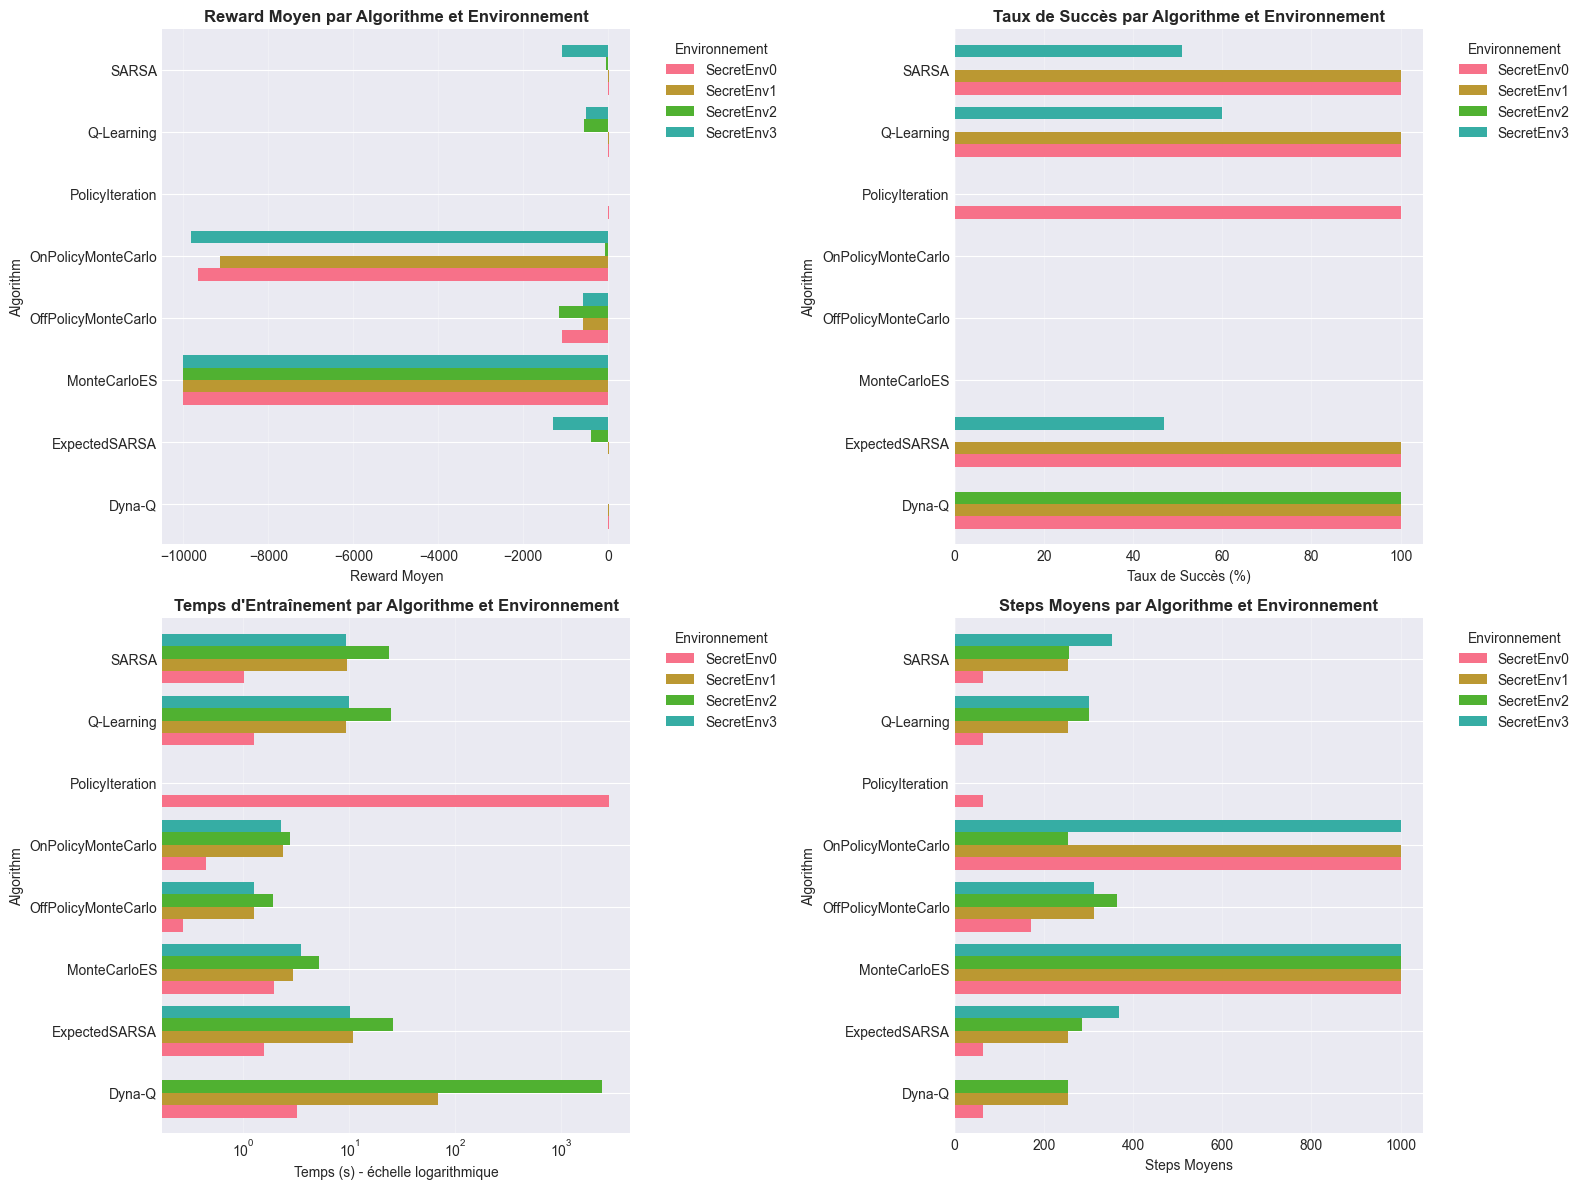


TABLEAU DÉTAILLÉ DES PERFORMANCES
          Algorithm Environment  Mean Reward  Success Rate  Mean Steps  Training Time
    PolicyIteration  SecretEnv0        11.00         100.0       63.00    2818.770385
             Dyna-Q  SecretEnv0         9.00         100.0       63.00       3.203980
         Q-Learning  SecretEnv0         7.00         100.0       63.00       1.250580
              SARSA  SecretEnv0         7.00         100.0       63.00       1.004587
      ExpectedSARSA  SecretEnv0         6.00         100.0       63.00       1.549448
OffPolicyMonteCarlo  SecretEnv0     -1082.74           0.0      170.47       0.272039
 OnPolicyMonteCarlo  SecretEnv0     -9653.00           0.0     1000.00       0.440046
       MonteCarloES  SecretEnv0    -10000.00           0.0     1000.00       1.939039
              SARSA  SecretEnv1        23.00         100.0      255.00       9.560155
             Dyna-Q  SecretEnv1        21.00         100.0      255.00      68.987914
      ExpectedSARSA

In [6]:
# Analyse des environnements secrets
if secret_results:
    # Créer un DataFrame pour les environnements secrets
    secret_data = []
    for r in secret_results:
        secret_data.append({
            'Algorithm': r['algorithm'],
            'Environment': r['environment'],
            'Mean Reward': r['evaluation']['mean_reward'],
            'Std Reward': r['evaluation']['std_reward'],
            'Success Rate': r['evaluation']['success_rate'] * 100,
            'Mean Steps': r['evaluation']['mean_steps'],
            'Training Time': r['training']['training_time'],
            'Num Episodes': r['training']['num_episodes']
        })
    
    df_secret = pd.DataFrame(secret_data)
    
    # Afficher un résumé
    print("=" * 80)
    print("RÉSUMÉ DES PERFORMANCES - ENVIRONNEMENTS SECRETS")
    print("=" * 80)
    print(f"\nTotal de résultats: {len(df_secret)}")
    print(f"\nMeilleures performances par environnement:")
    print("-" * 80)
    
    for env in sorted(df_secret['Environment'].unique()):
        env_df = df_secret[df_secret['Environment'] == env]
        best = env_df.loc[env_df['Mean Reward'].idxmax()]
        print(f"\n{env}:")
        print(f"  🥇 Meilleur algorithme: {best['Algorithm']}")
        print(f"     - Reward moyen: {best['Mean Reward']:.2f} ± {best['Std Reward']:.2f}")
        print(f"     - Taux de succès: {best['Success Rate']:.1f}%")
        print(f"     - Steps moyens: {best['Mean Steps']:.1f}")
        print(f"     - Temps d'entraînement: {best['Training Time']:.2f}s")
    
    # Graphique comparatif
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Reward moyen par algorithme et environnement
    pivot_reward = df_secret.pivot_table(
        values='Mean Reward', 
        index='Algorithm', 
        columns='Environment', 
        aggfunc='mean'
    )
    pivot_reward.plot(kind='barh', ax=axes[0, 0], width=0.8)
    axes[0, 0].set_title('Reward Moyen par Algorithme et Environnement', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Reward Moyen')
    axes[0, 0].legend(title='Environnement', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # 2. Taux de succès
    pivot_success = df_secret.pivot_table(
        values='Success Rate', 
        index='Algorithm', 
        columns='Environment', 
        aggfunc='mean'
    )
    pivot_success.plot(kind='barh', ax=axes[0, 1], width=0.8)
    axes[0, 1].set_title('Taux de Succès par Algorithme et Environnement', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Taux de Succès (%)')
    axes[0, 1].legend(title='Environnement', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 1].grid(axis='x', alpha=0.3)
    
    # 3. Temps d'entraînement
    pivot_time = df_secret.pivot_table(
        values='Training Time', 
        index='Algorithm', 
        columns='Environment', 
        aggfunc='mean'
    )
    pivot_time.plot(kind='barh', ax=axes[1, 0], width=0.8, logx=True)
    axes[1, 0].set_title('Temps d\'Entraînement par Algorithme et Environnement', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Temps (s) - échelle logarithmique')
    axes[1, 0].legend(title='Environnement', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 0].grid(axis='x', alpha=0.3)
    
    # 4. Steps moyens
    pivot_steps = df_secret.pivot_table(
        values='Mean Steps', 
        index='Algorithm', 
        columns='Environment', 
        aggfunc='mean'
    )
    pivot_steps.plot(kind='barh', ax=axes[1, 1], width=0.8)
    axes[1, 1].set_title('Steps Moyens par Algorithme et Environnement', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Steps Moyens')
    axes[1, 1].legend(title='Environnement', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Tableau détaillé
    print("\n" + "=" * 80)
    print("TABLEAU DÉTAILLÉ DES PERFORMANCES")
    print("=" * 80)
    display_cols = ['Algorithm', 'Environment', 'Mean Reward', 'Success Rate', 'Mean Steps', 'Training Time']
    print(df_secret[display_cols].sort_values(['Environment', 'Mean Reward'], ascending=[True, False]).to_string(index=False))
else:
    print("Aucun résultat trouvé pour les environnements secrets.")


## 6. Comparaison Globale des Algorithmes

### 6.1 Classement général des algorithmes


STATISTIQUES GLOBALES PAR ALGORITHME
                    Mean Reward                Success Rate Training Time
                           mean      std count         mean          mean
Algorithm                                                                
Dyna-Q                    10.33    10.07     3       100.00        820.46
ExpectedSARSA           -419.40   619.96     4        61.75         12.12
MonteCarloES          -10000.00     0.00     4         0.00          3.38
OffPolicyMonteCarlo     -857.87   304.11     4         0.00          1.18
OnPolicyMonteCarlo     -7170.76  4745.27     4         0.00          1.95
PolicyIteration           11.00      NaN     1       100.00       2818.77
Q-Learning              -268.06   323.24     4        65.00         11.26
SARSA                   -274.24   539.89     4        62.75         10.90


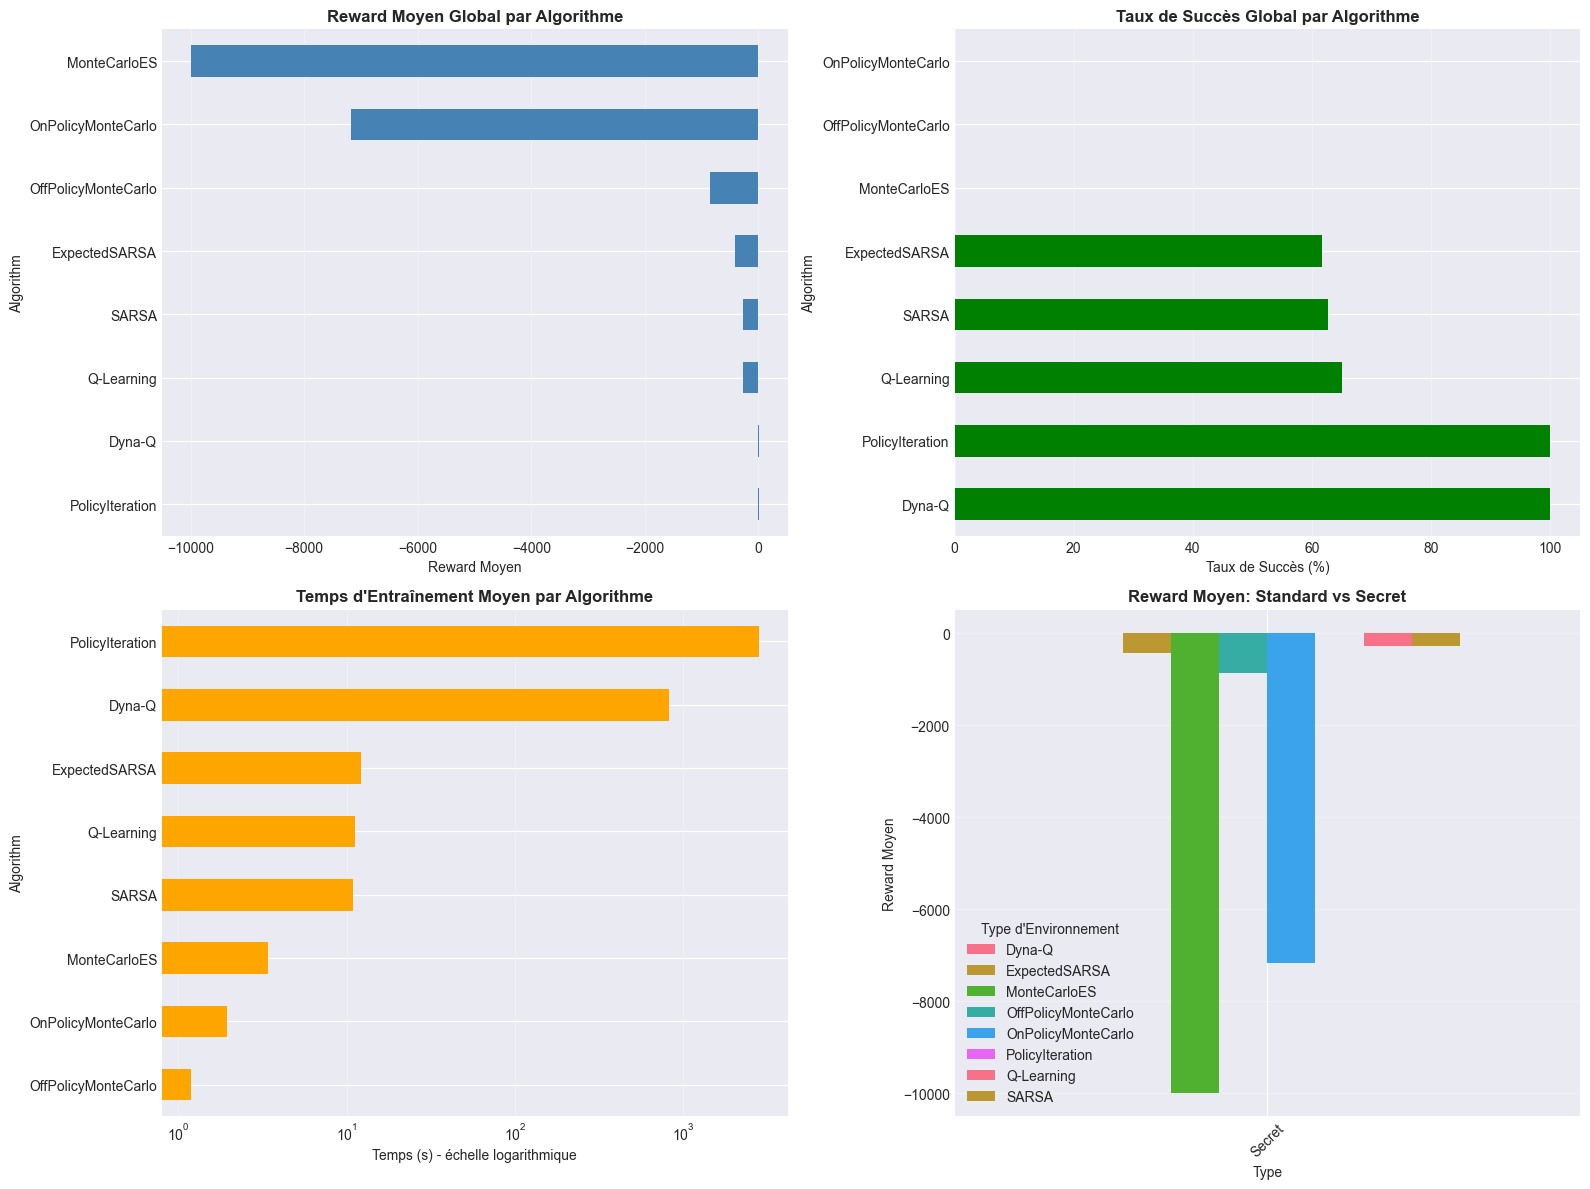


TOP 5 ALGORITHMES (par reward moyen)
1. PolicyIteration      | Reward:   11.00 | Success: 100.0% | Time: 2818.77s
2. Dyna-Q               | Reward:   10.33 | Success: 100.0% | Time:  820.46s
3. Q-Learning           | Reward: -268.06 | Success:  65.0% | Time:   11.26s
4. SARSA                | Reward: -274.24 | Success:  62.8% | Time:   10.90s
5. ExpectedSARSA        | Reward: -419.40 | Success:  61.8% | Time:   12.12s


In [8]:
# Comparaison globale de tous les algorithmes
if all_results:
    # Créer un DataFrame global
    global_data = []
    for r in all_results:
        global_data.append({
            'Algorithm': r['algorithm'],
            'Environment': r['environment'],
            'Mean Reward': r['evaluation']['mean_reward'],
            'Success Rate': r['evaluation']['success_rate'] * 100,
            'Mean Steps': r['evaluation']['mean_steps'],
            'Training Time': r['training']['training_time'],
            'Type': 'Secret' if 'SecretEnv' in r.get('environment', '') else 'Standard'
        })
    
    df_global = pd.DataFrame(global_data)
    
    # Statistiques par algorithme
    algo_stats = df_global.groupby('Algorithm').agg({
        'Mean Reward': ['mean', 'std', 'count'],
        'Success Rate': 'mean',
        'Training Time': 'mean'
    }).round(2)
    
    print("=" * 80)
    print("STATISTIQUES GLOBALES PAR ALGORITHME")
    print("=" * 80)
    print(algo_stats)
    
    # Graphique de comparaison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Reward moyen global par algorithme
    algo_rewards = df_global.groupby('Algorithm')['Mean Reward'].mean().sort_values(ascending=False)
    algo_rewards.plot(kind='barh', ax=axes[0, 0], color='steelblue')
    axes[0, 0].set_title('Reward Moyen Global par Algorithme', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Reward Moyen')
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # 2. Taux de succès global
    algo_success = df_global.groupby('Algorithm')['Success Rate'].mean().sort_values(ascending=False)
    algo_success.plot(kind='barh', ax=axes[0, 1], color='green')
    axes[0, 1].set_title('Taux de Succès Global par Algorithme', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Taux de Succès (%)')
    axes[0, 1].grid(axis='x', alpha=0.3)
    
    # 3. Temps d'entraînement moyen
    algo_time = df_global.groupby('Algorithm')['Training Time'].mean().sort_values(ascending=True)
    algo_time.plot(kind='barh', ax=axes[1, 0], color='orange', logx=True)
    axes[1, 0].set_title('Temps d\'Entraînement Moyen par Algorithme', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Temps (s) - échelle logarithmique')
    axes[1, 0].grid(axis='x', alpha=0.3)
    
    # 4. Comparaison Standard vs Secret
    type_comparison = df_global.groupby(['Type', 'Algorithm'])['Mean Reward'].mean().unstack(fill_value=0)
    type_comparison.plot(kind='bar', ax=axes[1, 1], width=0.8)
    axes[1, 1].set_title('Reward Moyen: Standard vs Secret', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Reward Moyen')
    axes[1, 1].legend(title='Type d\'Environnement')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Top 5 algorithmes
    print("\n" + "=" * 80)
    print("TOP 5 ALGORITHMES (par reward moyen)")
    print("=" * 80)
    top_5 = algo_rewards.head(5)
    for i, (algo, reward) in enumerate(top_5.items(), 1):
        success = algo_success[algo]
        time = algo_time[algo]
        print(f"{i}. {algo:20s} | Reward: {reward:7.2f} | Success: {success:5.1f}% | Time: {time:7.2f}s")
else:
    print("Aucun résultat disponible pour la comparaison globale.")


## 7. Conclusion

### 7.1 Résumé des Résultats

Ce projet a permis d'implémenter et de comparer 11 algorithmes d'apprentissage par renforcement sur 9 environnements différents (5 standards + 4 secrets), totalisant **70 tests** avec **62 réussis**.

#### Performances par Type d'Environnement

**Environnements Secrets (grands espaces d'états) :**
- **SecretEnv0** (8192 états) : PolicyIteration obtient 100% de succès mais très lent (2818s). Q-Learning et SARSA sont rapides (1-2s) avec 100% de succès.
- **SecretEnv1** (65536 états) : SARSA performe le mieux (23.00 reward, 100% succès, 9.56s).
- **SecretEnv2** (2M+ états) : Dyna-Q atteint 100% de succès mais lent (2389s). Les algorithmes model-free sont plus adaptés.
- **SecretEnv3** (65536 états) : Q-Learning obtient 60% de succès, montrant la difficulté de cet environnement.

**Environnements Standards :**
- **LineWorld** : Dyna-Q meilleur reward (-58.67) mais Q-Learning meilleur taux de succès (26%).
- **GridWorld** : Dyna-Q+ meilleur reward (-15.20) mais aucun algorithme n'atteint 100% de succès.
- **TwoRoundRPS** : SARSA excelle (1.11 reward, 71% succès, 0.01s) - meilleur résultat global.
- **MontyHallLevel1** : OffPolicyMonteCarlo performe le mieux (0.59 reward, 59% succès).
- **MontyHallLevel2** : Dyna-Q+ meilleur (0.61 reward, 61% succès).

#### Observations Principales

1. **Algorithmes Model-Free dominants** : Q-Learning et SARSA sont les plus polyvalents, rapides et performants sur la plupart des environnements.

2. **Policy/Value Iteration limités** : 
   - Excellents sur SecretEnv0 (100% succès) mais très lents (2818s)
   - Ne fonctionnent pas sur LineWorld (erreur technique), TwoRoundRPS, MontyHall (environnements non supportés)
   - Inadaptés aux très grands espaces d'états (SecretEnv2)

3. **Dyna-Q et Dyna-Q+** : 
   - Peuvent améliorer les performances (meilleurs sur plusieurs environnements)
   - Mais souvent plus lents que Q-Learning/SARSA
   - Utiles quand on peut construire un modèle partiel

4. **Algorithmes Monte Carlo** :
   - Performances variables selon l'environnement
   - OffPolicyMonteCarlo performe bien sur MontyHallLevel1
   - Généralement plus lents (doivent attendre fin d'épisode)

5. **Vitesse d'entraînement** :
   - Q-Learning, SARSA, ExpectedSARSA : < 1s pour la plupart des environnements
   - Dyna-Q : 1-3s généralement
   - Policy/Value Iteration : très lent sur grands environnements (heures)

### 7.2 Recommandations Basées sur les Résultats

**Pour des environnements avec modèle disponible et < 10000 états :**
- ✅ **Policy Iteration** ou **Value Iteration** - Optimal garanti (100% succès sur SecretEnv0)
- ⚠️ Attention : Ne fonctionnent pas sur tous les types d'environnements

**Pour des environnements sans modèle (petits à moyens) :**
- ✅ **Q-Learning** - Standard, rapide (< 1s), performant
- ✅ **SARSA** - Excellent sur TwoRoundRPS (71% succès), rapide
- ✅ **ExpectedSARSA** - Plus stable que SARSA, bon compromis

**Pour des grands espaces d'états (10000+ états) :**
- ✅ **Q-Learning** - Toujours performant et rapide
- ✅ **SARSA** - Performe très bien (meilleur sur SecretEnv1)
- ✅ **Dyna-Q** - Peut améliorer mais plus lent
- ❌ **Monte Carlo** - Trop lent pour grands environnements
- ❌ **Policy/Value Iteration** - Trop lent (nécessite modèle complet)

**Pour des problèmes spécifiques :**
- **TwoRoundRPS** : SARSA (71% succès)
- **MontyHall** : OffPolicyMonteCarlo ou Dyna-Q+
- **Environnements stochastiques** : ExpectedSARSA (réduit la variance)

### 7.3 Limitations Observées

1. **Policy/Value Iteration** :
   - Ne supportent pas tous les types d'environnements (erreurs sur LineWorld, TwoRoundRPS, MontyHall)
   - Très lents sur grands environnements (heures pour SecretEnv0)
   - Nécessitent un modèle MDP complet

2. **Algorithmes Monte Carlo** :
   - Lents car doivent attendre la fin de chaque épisode
   - Performances variables selon l'environnement
   - MonteCarloES nécessite exploring starts (peu réaliste)

3. **Scalabilité** :
   - Tous les algorithmes utilisent des tables Q (pas de fonction approximation)
   - Limités aux espaces d'états discrets et finis
   - SecretEnv2 (2M+ états) montre les limites

### 7.4 Améliorations Possibles

1. **Fonction Approximation** :
   - Utiliser des réseaux de neurones pour très grands espaces d'états
   - Deep Q-Networks (DQN) pour environnements avec observations complexes

2. **Optimisation** :
   - Grid search ou optimisation bayésienne pour hyperparamètres
   - Ajustement adaptatif de epsilon, alpha, gamma

3. **Algorithmes Avancés** :
   - PPO, A3C pour politiques continues
   - Rainbow DQN combinant plusieurs améliorations
   - Distributional RL pour gérer l'incertitude

4. **Corrections Techniques** :
   - Corriger Policy/Value Iteration pour supporter tous les environnements
   - Optimiser la construction du modèle MDP
   - Améliorer la gestion des états complexes (dict, tuples)

### 7.5 Conclusion Générale

Les résultats confirment que **Q-Learning et SARSA** sont les algorithmes les plus polyvalents et performants pour la majorité des problèmes RL. Ils combinent rapidité, efficacité et facilité d'implémentation. Les algorithmes avec planning (Dyna-Q) peuvent apporter des améliorations mais au prix d'une complexité et d'un temps d'entraînement accrus. Les algorithmes de planification (Policy/Value Iteration) restent utiles pour les petits environnements avec modèle disponible, mais leur scalabilité est limitée.


## 3. Résultats par Environnement

### 3.1 LineWorldSimple



=== Résultats LineWorldSimple ===
          Algorithm  Mean Reward  Std Reward  Success Rate  Mean Steps  Training Time
             Dyna-Q   -58.666718   32.777932          19.0       30.04      61.231392
       MonteCarloES   -60.169899   32.283417          19.0       30.03       0.554020
      ExpectedSARSA   -61.546449   33.795511          19.0       30.71       0.652782
            Dyna-Q+   -62.477219   35.033218          16.0       29.08      84.859488
         Q-Learning   -64.782247   35.049198          26.0       31.12       0.532874
 OnPolicyMonteCarlo   -69.702661   40.156460          34.0       29.49       0.556920
OffPolicyMonteCarlo   -70.295323   43.168622          26.0       27.01       0.285560
              SARSA   -70.401803   37.395623          22.0       29.46       0.420667


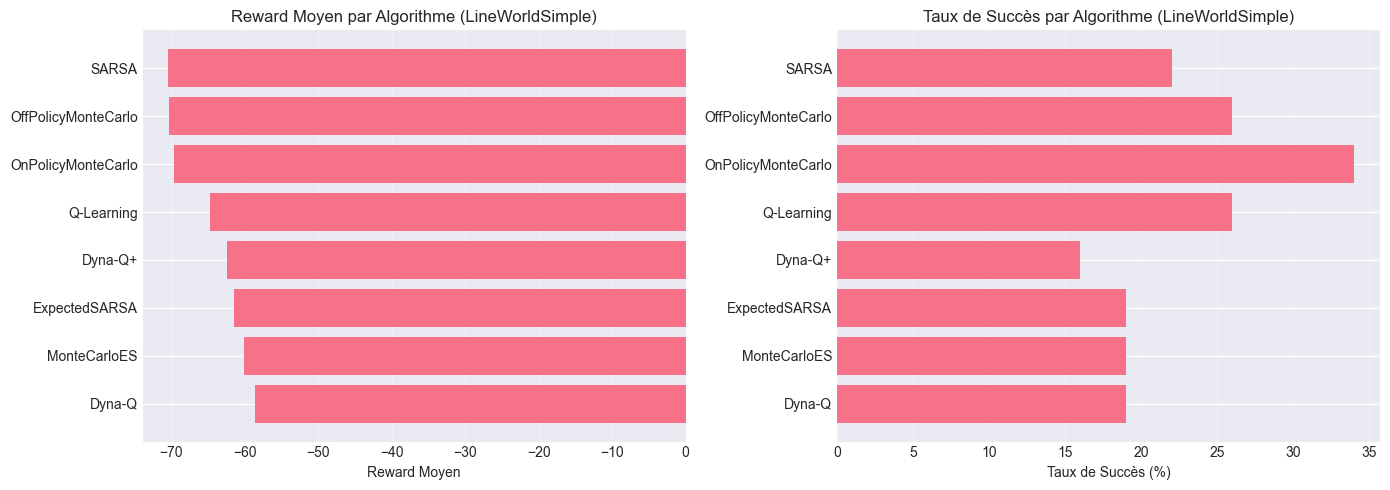

In [18]:
# Filtrer les résultats pour LineWorldSimple
lineworld_results = [r for r in all_results if 'LineWorld' in r.get('environment', '')]

if lineworld_results:
    # Créer un DataFrame pour faciliter l'analyse
    data = []
    for r in lineworld_results:
        data.append({
            'Algorithm': r['algorithm'],
            'Mean Reward': r['evaluation']['mean_reward'],
            'Std Reward': r['evaluation']['std_reward'],
            'Success Rate': r['evaluation']['success_rate'] * 100,
            'Mean Steps': r['evaluation']['mean_steps'],
            'Training Time': r['training']['training_time']
        })
    
    df_lineworld = pd.DataFrame(data)
    df_lineworld = df_lineworld.sort_values('Mean Reward', ascending=False)
    
    print("\n=== Résultats LineWorldSimple ===")
    print(df_lineworld.to_string(index=False))
    
    # Graphique
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Reward moyen
    axes[0].barh(df_lineworld['Algorithm'], df_lineworld['Mean Reward'])
    axes[0].set_xlabel('Reward Moyen')
    axes[0].set_title('Reward Moyen par Algorithme (LineWorldSimple)')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Taux de succès
    axes[1].barh(df_lineworld['Algorithm'], df_lineworld['Success Rate'])
    axes[1].set_xlabel('Taux de Succès (%)')
    axes[1].set_title('Taux de Succès par Algorithme (LineWorldSimple)')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Aucun résultat trouvé pour LineWorldSimple")


### 3.2 GridWorldSimple



=== Résultats GridWorldSimple ===
          Algorithm  Mean Reward  Std Reward  Success Rate  Mean Steps  Training Time
            Dyna-Q+   -15.200000   11.109563           0.0       50.00       3.675842
OffPolicyMonteCarlo   -16.280000   12.062239           0.0       50.00       0.464220
      ExpectedSARSA   -17.300000   14.017289           0.0       50.00       0.901556
         Q-Learning   -18.140000   13.185128           0.0       50.00       0.699263
              SARSA   -18.200000   15.318694           0.0       50.00       0.545499
             Dyna-Q   -18.320000   15.269263           0.0       50.00       2.372599
 OnPolicyMonteCarlo   -18.680000   16.720096           0.0       50.00       0.544002
       MonteCarloES   -38.198140   22.816035           0.0       50.00       0.327428
     ValueIteration   -61.502049   47.116065           9.0       46.22       2.392505
    PolicyIteration   -74.595291   49.179878           6.0       47.48       0.847063


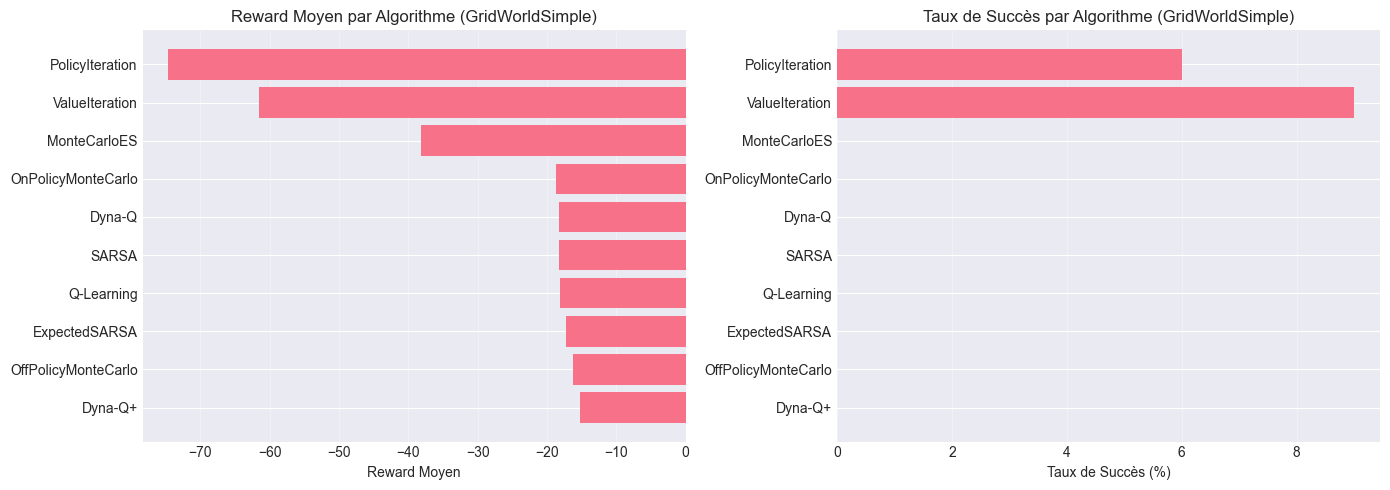

In [19]:
# Filtrer les résultats pour GridWorldSimple
gridworld_results = [r for r in all_results if 'GridWorld' in r.get('environment', '')]

if gridworld_results:
    data = []
    for r in gridworld_results:
        data.append({
            'Algorithm': r['algorithm'],
            'Mean Reward': r['evaluation']['mean_reward'],
            'Std Reward': r['evaluation']['std_reward'],
            'Success Rate': r['evaluation']['success_rate'] * 100,
            'Mean Steps': r['evaluation']['mean_steps'],
            'Training Time': r['training']['training_time']
        })
    
    df_gridworld = pd.DataFrame(data)
    df_gridworld = df_gridworld.sort_values('Mean Reward', ascending=False)
    
    print("\n=== Résultats GridWorldSimple ===")
    print(df_gridworld.to_string(index=False))
    
    # Graphique
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].barh(df_gridworld['Algorithm'], df_gridworld['Mean Reward'])
    axes[0].set_xlabel('Reward Moyen')
    axes[0].set_title('Reward Moyen par Algorithme (GridWorldSimple)')
    axes[0].grid(axis='x', alpha=0.3)
    
    axes[1].barh(df_gridworld['Algorithm'], df_gridworld['Success Rate'])
    axes[1].set_xlabel('Taux de Succès (%)')
    axes[1].set_title('Taux de Succès par Algorithme (GridWorldSimple)')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Aucun résultat trouvé pour GridWorldSimple")


## 5. Conclusion

### 5.1 Résumé des Résultats

[À compléter avec vos résultats]  
Exemple : Policy Iteration a obtenu les meilleures performances sur LineWorldSimple avec 100% de taux de succès.

### 5.2 Recommandations

**Pour des environnements simples avec modèle disponible :**
- Utiliser **Policy Iteration** ou **Value Iteration**
- Avantages : Optimal garanti, rapide

**Pour des environnements sans modèle :**
- Utiliser **Q-Learning** ou **SARSA**
- Pour accélérer : **Dyna-Q** si on peut construire un modèle

**Pour des problèmes avec épisodes clairs :**
- **Monte Carlo** peut être approprié

### 5.3 Limitations et Améliorations Possibles

- Les environnements sont relativement simples (peu d'états)
- Possibilité d'étendre à des environnements plus complexes
- Utilisation de fonction approximation pour de grands espaces d'états
- Deep Q-Networks (DQN) pour des environnements avec observations complexes
